In [1]:
import geopandas as gpd
import sys
sys.path.append('..')
import hiveline as hl
from hiveline.vc.vcgenerator import VirtualCommuterGenerator

# Example of random point generation for a given tile

In [2]:
place_name = 'Eindhoven, Netherlands'
place = hl.Place(place_name, '2020')

Data found in db


In [ ]:
vcgen = VirtualCommuterGenerator(place)

In [4]:
vcgen.load_roads()

Loading roads from Eindhoven, Netherlands...
Done


,geometry,h3,length,proba
0,"LINESTRING (5.45161 51.43612, 5.45154 51.43610...",613046304622247935,36.36,0.001959
1,"LINESTRING (5.45161 51.43612, 5.45164 51.43606...",613046304622247935,28.75,0.001549
2,"LINESTRING (5.45186 51.43544, 5.45186 51.43538...",613046304622247935,34.27,0.001846
3,"LINESTRING (5.45186 51.43544, 5.45171 51.43572...",613046304622247935,34.31,0.001848
4,"LINESTRING (5.45032 51.42675, 5.44982 51.42635...",613046304651608063,92.30,0.006626
...,...,...,...,...
31891,"LINESTRING (5.45974 51.47491, 5.45976 51.47485...",613046304433504255,24.23,0.001431
31892,"LINESTRING (5.45974 51.47491, 5.45944 51.47470...",613046304433504255,84.12,0.004967
31893,"LINESTRING (5.45350 51.42670, 5.45303 51.42695...",613046304651608063,89.29,0.006410
31894,"LINESTRING (5.45137 51.43690, 5.45134 51.43686...",613046304622247935,69.34,0.003735


In [5]:
tile_id = 613046221539377151
tile = vcgen.city.tiles.loc[vcgen.city.tiles['h3']==tile_id, 'geometry']
roads = vcgen.roads_gdf[vcgen.roads_gdf['h3']==tile_id]

realistic set to True will generate points along roads

In [6]:
realistic = True
if realistic:
    get_rand_point = vcgen.sample_point_from_roads
else:
    get_rand_point = vcgen.rand_point_in_tile

# generate points
points = []
for i in range(100):
    points.append(get_rand_point(tile_id))
origins = gpd.GeoSeries(points)

<Axes: >

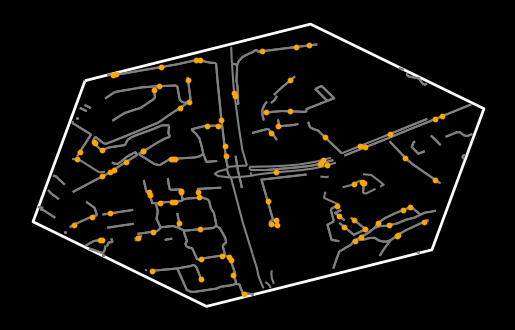

In [7]:
# plot tile, roads and points
base = tile.plot(color='black', edgecolor='white', linewidth=2)
base.set_axis_off()
ax = roads.plot(ax=base, edgecolor='grey', color='grey', markersize=1, zorder=1)
origins.plot(ax=ax, color='orange', markersize=10, zorder=2)